# Eigenvectors and eigenvalues


Here we will see some examples of how matrices are useful in scientific programming: specifically, the important role that the *eigenvectors* and *eigenvalues* of these matrices play. Actually, this sort of analysis is central to disciplines ranging from economics to engineering; right now just considering two examples, from physics and ecology.

In [1]:
from matplotlib import pyplot as plt
from numpy.linalg import eig
import numpy as np

We can find the eigenvectors and eigenvalues of a matrix together by using the function `eig` from `numpy.linalg`. As a quick reminder of their properties and a test of this function, I will do a simple example and **calculate the eigenvectors and eigenvalues of the matrix below**.

$$\mathbf{M} = 
\begin{pmatrix}
1 & -2 \\ 1 & 4
\end{pmatrix}
$$


In [2]:
test_matrix = eig([[1,-2],[1,4]])
print('Eigenvalues = ', test_matrix[0])
print('First eigenvector = ', test_matrix[1][:,0], 'Second eigenvector = ', test_matrix[1][:,1])

Eigenvalues =  [2. 3.]
First eigenvector =  [-0.89442719  0.4472136 ] Second eigenvector =  [ 0.70710678 -0.70710678]


## An ecology example: Leslie matrices

An important task in ecology is to study the population of species as a function of time. If a species has different forms or ages (*e.g.*, for butterflies egg, larva, chrysalis, then adult), the number of each form will depend on the number of the *other* forms in the previous time period: eggs will hatch into larvae, while adults lay eggs.

To take a concrete example, let's suppose that some animal has a lifespan of four years: the first year as an infant, the second as an adolescent, the third as a young adult, and the fourth as a mature adult. These animals can reproduce after the first year, but reproduction rates are greater for older animals. Only a few infants survive to adolescence, but there is then a greater chance of surviving to young adulthood and a greater chance still of surviving to maturity. This could be described as a Leslie matrix model:

$$
\begin{pmatrix}x_1 \\ x_2 \\ x_3 \\ x_4\end{pmatrix}_{t=1} = 
\begin{pmatrix} 0 & 4 & 20 & 60 \\ 0.05 & 0 & 0 & 0 \\ 0 & 0.3 & 0 & 0 \\ 0 & 0 & 0.6 & 0 \end{pmatrix}
\begin{pmatrix}x_1 \\ x_2 \\ x_3 \\ x_4\end{pmatrix}_{t=0}
$$

where $x_1, \dots, x_4$ represent the population at each stage of the life cycle, and the square matrix is the Leslie matrix itself.

**I will represent this matrix.** If the initial populations are $x_1 = 500, x_2 = 50, x_3 = 6, x_4 = 3$, **and calculating the populations after 1 year.**

In [3]:
matrix = np.array([[0, 4, 20, 60], [0.05, 0, 0, 0], [0, 0.3, 0, 0], [0, 0, 0.6, 0]])
matrix.dot(np.array([500, 50, 6, 3]))

array([500. ,  25. ,  15. ,   3.6])

**Plotting  the population of each life stage as a function of time for 20 years.**

Text(0, 0.5, 'Population')

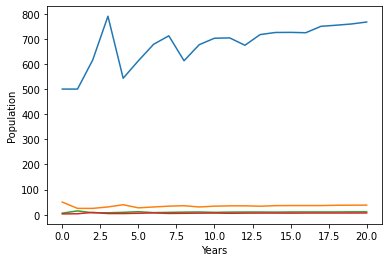

In [4]:
x1, x2, x3, x4 = 500, 50, 6, 3
matrix = np.array([[0, 4, 20, 60], [0.05, 0, 0, 0], [0, 0.3, 0, 0], [0, 0, 0.6, 0]])
years = list(np.arange(0,21,1))

X1 = []
X2 = []
X3 = []
X4 = []


for i in np.arange(0,21,1):
    X1.append(x1)
    X2.append(x2)
    X3.append(x3)
    X4.append(x4)

    x1, x2, x3, x4 = matrix.dot(np.array([x1, x2, x3, x4]))

plt.plot(years, X1)
plt.plot(years, X2)
plt.plot(years, X3)
plt.plot(years, X4)
plt.xlabel('Years')
plt.ylabel('Population')

To analyse the long-term prognosis for this population, we turn to the eigenvalues of the Leslie matrix. The dominant eigenvalue that determines the population in the long term will be the one with the greatest magnitude. If its magnitude is greater than 1, there will be exponential growth, but if it is less than one then this will become exponential decay.

**Calculating dominant eigenvalue**

In [5]:
matrix = np.array([[0, 4, 20, 60], [0.05, 0, 0, 0], [0, 0.3, 0, 0], [0, 0, 0.6, 0]])
a = eig(matrix)
print('eigenvector responsible for growth = ', abs(a[0][0]))

eigenvector responsible for growth =  1.011871479428346


The eigenvectors are orthonormal and have a norm =1.  The individual components indicate the fraction of the population in each group (e.g., infant, adolescent, young adult, mature adult).

**Long-term population distribution** – that is, for every mature adult, how many young adults, adolescents, and juveniles would you expect?

In [6]:
((1.011871479428346)**20)*np.array([500, 50, 6, 3])

array([633.10698607,  63.31069861,   7.59728383,   3.79864192])

**Plotting a graph of the dominant eigenvalue as a function of the infant survival rate** (*i.e.*, the `[1,0]` element of the Leslie matrix) **over a range just below its initial value of 0.05.

C:\Users\mehul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'infant survival rate')

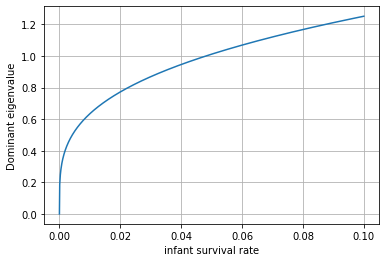

In [7]:
dominant_eig = []
infant_rate = np.linspace(0, 0.1, 1000)

for i in infant_rate:
    matrix = np.array([[0, 4, 20, 60], [i, 0, 0, 0], [0, 0.3, 0, 0], [0, 0, 0.6, 0]])
    a = eig(matrix)
    dominant_eig.append(a[0].max())

plt.plot(infant_rate, dominant_eig)
plt.grid()
plt.ylabel('Dominant eigenvalue')
plt.xlabel('infant survival rate')

**As you can see above, if the infant survival rate is below aprrox 0.045 then they will go extinct!**

## A physics example: normal modes of vibrating molecules

When the force on some object depends linearly on the positions of *other* objects, we can write the equations of motion as a single matrix equation. This is very often the case for the motion of chemically bonded atoms. For instance, consider a molecule of carbon dioxide:

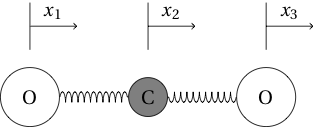

As the diagram suggests, we model this as three point masses connected by ideal springs. The C atom has mass $m$, the O atoms mass $M$, and the bonds have spring constant $J$. Then the equations of motion are

$$
\begin{align*}
M\ddot{x}_1 &= -J(x_1 - x_2) \\
m\ddot{x}_2 &= -J(x_2 - x_1) - J(x_2 - x_3)\\
M\ddot{x}_3 &= -J(x_3 - x_2) \\
\end{align*}
$$

Let's write this as a matrix equation, $\ddot{\mathbf{x}} = -\mathbf{A}\mathbf{x}$. Then, if $\mathbf{x}$ is an eigenvector of $\mathbf{A}$ with positive eigenvalue $\lambda$, $\ddot{\mathbf{x}} = -\mathbf{A}\mathbf{x} = -\lambda\mathbf{x}$ and we have the equation for simple harmonic motion with frequency $\sqrt{\lambda}$.

**Finding $\mathbf{A}$ and its eigenvectors and eigenvalues.** The atomic mass of the oxygen atom is $M = 16$ and the atomic mass of the carbon atom is $m = 12$.  However, the equations are simpler if we use units of atomic mass of oxygen.  That is, set $M=1$ and $m=12/16$.

In [8]:
J = 1
M = 1
m = 12/16

# matrix A
matrix = np.array([[-J/M, J/M, 0], [J/m, -2*J/m, J/m], [0, J/M, -J/M]])
a = eig(matrix)

a

(array([-3.66666667e+00, -1.00000000e+00, -1.00429348e-16]),
 array([[-3.31294578e-01, -7.07106781e-01,  5.77350269e-01],
        [ 8.83452209e-01, -1.48766011e-16,  5.77350269e-01],
        [-3.31294578e-01,  7.07106781e-01,  5.77350269e-01]]))

**Sketching the motion of the atoms corresponding to each of the eigenvectors**

[--O-C--+-----O] [---O--C-----O-] [-O-------+--C--O-]